In [1]:
# Connection avec Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
from IPython.display import Image 
Image(url="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg")

Une **tumeur cérébrale** est une masse de **cellules anormales** qui se multiplient dans le **cerveau** de façon incontrôlée.

Il existe 2 grands types de tumeurs cérébrales selon leur nature cancéreuse ou non :

Une tumeur cérébrale (cancer du cerveau) : tout comprendre en 2 min
Play Video
Les **tumeurs bénignes** (non cancéreuses). Elles se forment assez lentement et restent le plus souvent isolées des tissus cérébraux voisins. Elles ne se propagent pas à d'autres parties du cerveau ni à d'autres organes et sont généralement plus faciles à extraire par chirurgie que les tumeurs malignes. Cependant, certaines tumeurs pourtant bénignes demeurent inextirpables du fait de leur localisation.

Les **tumeurs malignes** (cancéreuses). Il n'est pas toujours facile de les distinguer des tissus voisins. De ce fait, il est parfois difficile de les extraire entièrement sans endommager le tissu cérébral avoisinant.

Des examens, comme ***l’imagerie par résonnance magnétique (IRM)***, PET scan (tomoscintigraphie par émission de positons) et la tomodensitométrie (« CT scan »), permettent de localiser précisément la tumeur. **Une biopsie** (prélèvement de tissu tumoral afin de l'analyser) est essentielle pour déterminer la nature bénigne (non cancéreuse) ou maligne (cancéreuse) de la tumeur.

Les tumeurs cérébrales se distinguent aussi selon leur provenance et leurlocalisation.

On distingue :

Les **tumeurs cérébrales primaires**, sont celles qui prennent naissance dans le cerveau. Elles peuvent être bénignes (non cancéreuses) ou malignes (cancéreuses). Leur dénomination provient du tissu cérébral dans lequel elles se développent.

Parmi les tumeurs malignes les plus fréquente on retrouve :

 - Les tumeurs gliales, ou **gliomes** (tumeurs malignes) représentant 50 à 60 % de l'ensemble des tumeurs cérébrales. Elles se forment à partir des cellules gliales, cellules intervenant comme structure de soutien des cellules nerveuses(neurones).

- Les **médulloblastomes** (tumeurs malignes), se développent à partir de la moelle épinière au stade embryonnaire. Ce sont les tumeurs cérébrales les plus courantes chez les **enfants**.

- Enfin, parmi les tumeurs primaires bénignes, plus rares que les tumeurs primaires malignes, on retrouve les hémangioblastomes, les méningiomes, les adénomes hypophysaires, les ostéomes, les pinéalomes, etc.

Les **tumeurs secondaires** ou **métastatiques sont** malignes (cancéreuses) et proviennent d'autres organes où existe un cancer et dont les cellules tumorales ont migré vers le cerveau et s’y multiplient. Les cellules tumorales sont transportées par le sang et se développent le plus souvent à la jonction entre la substance blanche et la substance grise du cerveau. Ces tumeurs secondaires sont **plus fréquentes** que les tumeurs primaires.

D'ailleurs, on estime que 25 % des personnes décédées de cancers de toutes natures sont porteuses de métastases cérébrales1. Parmi les tumeurs les plus fréquemment à l’origine de métastases cérébrales : le cancer du sein, le cancer du poumon, le cancer de la peau (mélanome), le cancer du rein, le cancer du côlon, etc.

<h1>Qui est touché?<h1>

Chaque année en France, environ **6.000 personnes** sont diagnostiquées avec une **tumeur cérébrale primaire**. Elles représentent 2 % de l'ensemble des cancers2. Au Canada, les tumeurs cérébrales primaires touchent 8 personnes sur 100 000. Quant aux tumeurs métastatiques, elles concernent environ 32 personnes sur 100 000. De grandes études épidémiologiques démontrent que le nombre de tumeurs cérébrales en Occident est en hausse depuis plusieurs décennies, sans que l'on sache vraiment pourquoi. Pour autant, l'usage intensif du téléphone cellulaire semble incriminé dans l'augmentation du nombre de certaines tumeurs cérébrales primaires comme le montrent de nombreuses études3,4,5. En matière d'usage du portable, les enfants seraient plus exposés aux tumeurs cérébrales que les adultes.



In [2]:
import numpy as np 
import pandas as pd
import os
import cv2
from keras import layers
from matplotlib import pyplot as plt
from random import sample
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

<h1>Dataset Description<h1>

Les données d'image qui ont été utilisées pour ce problème sont des images d'IRM cérébrale pour la détection des tumeurs cérébrales. Il se compose de scans IRM de deux classes:

1.   **NON** - pas de tumeur, codé 0
2.   **OUI** - tumeur, codé 1

Malheureusement, la description de l'ensemble de données ne contient aucune information sur l'origine de ces examens IRM, etc.

In [3]:
os.chdir("/content/drive/MyDrive/Data/")

In [4]:
yes=os.listdir('/content/drive/MyDrive/Data/yes')
no=os.listdir('/content/drive/MyDrive/Data/no')

In [5]:
X_data =[]
for file in yes:
    img = cv2.imread('/content/drive/MyDrive/Data/yes/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [6]:
for file in no:
    img = cv2.imread('/content/drive/MyDrive/Data/no/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [7]:
X = np.squeeze(X_data)

In [8]:
X.shape

(253, 224, 224, 3)

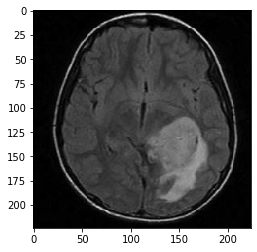

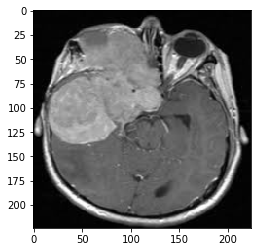

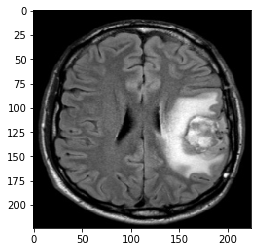

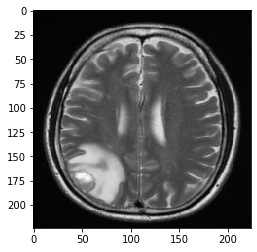

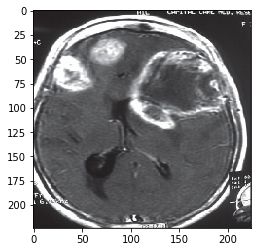

In [11]:
# Afficher 5 échantillon
for i in range(0,5):
  plt.imshow(X[i], interpolation='nearest')
  plt.show()

In [12]:
# Normaliser Data
X = X.astype('float32')
X /= 255

In [13]:
# Concatenation des donnés
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
len(data_target)

253

In [15]:
# Division Data
lenght = len(data_target)
index = np.arange(0,lenght,1)
len_train = round(lenght*0.7)
len_test = lenght - len_train
print ("train size :",len_train," test_size :",len_test)

train size : 177  test_size : 76


In [16]:
X_train, y_train, X_test, y_test = [],[],[],[]
test_index = sample(set(index), len_test)

for i in range(lenght):
    if i not in test_index:
        X_train.append(X[i])
        y_train.append(data_target[i])
    else:
        X_test.append(X[i])
        y_test.append(data_target[i])

In [17]:
X_train = np.squeeze(X_train)
y_train = np.asarray(y_train)
X_test = np.squeeze(X_test)
y_test = np.asarray(y_test)

In [18]:
print("X_train :",X_train.shape,
      "y_train :",y_train.shape,
     "\nX_test :",X_test.shape,
     "y_test :",y_test.shape)

X_train : (177, 224, 224, 3) y_train : (177,) 
X_test : (76, 224, 224, 3) y_test : (76,)


In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
y_train.shape

(177, 2)

<h1>VGG 16<h1>

In [36]:
model_vgg16 = VGG16(weights=None, include_top=False, input_shape = (224, 224, 3))# imagenet (par defaut)

In [37]:
# Freezing
model_vgg16.trainable =False

In [38]:
x = model_vgg16.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.45)(x)
x = Dense(256, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="sigmoid")(x)
model_final_vgg16 = Model(model_vgg16.input, x)

In [39]:
model_final_vgg16.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [40]:
model_final_vgg16.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['acc'])

In [42]:
history_vgg16 = model_final_vgg16.fit(X_train,y_train,
         batch_size=8,
         epochs=23,
         validation_data=(X_test, y_test))

Epoch 1/23
23/23 [==============================] - 2s 78ms/step - loss: 0.3378 - acc: 0.8927 - val_loss: 0.5569 - val_acc: 0.7632
Epoch 2/23
23/23 [==============================] - 2s 75ms/step - loss: 0.3209 - acc: 0.8814 - val_loss: 1.0649 - val_acc: 0.6579
Epoch 3/23
23/23 [==============================] - 2s 76ms/step - loss: 0.3400 - acc: 0.8757 - val_loss: 0.4825 - val_acc: 0.7895
Epoch 4/23
23/23 [==============================] - 2s 77ms/step - loss: 0.3134 - acc: 0.8588 - val_loss: 0.5708 - val_acc: 0.7368
Epoch 5/23
23/23 [==============================] - 2s 76ms/step - loss: 0.2535 - acc: 0.8983 - val_loss: 1.1409 - val_acc: 0.6579
Epoch 6/23
23/23 [==============================] - 2s 78ms/step - loss: 0.2730 - acc: 0.8927 - val_loss: 0.6653 - val_acc: 0.7500
Epoch 7/23
23/23 [==============================] - 2s 77ms/step - loss: 0.2882 - acc: 0.8814 - val_loss: 0.4563 - val_acc: 0.8158
Epoch 8/23
23/23 [==============================] - 2s 77ms/step - loss: 0.2220 - a

In [43]:
# Fonction pour afficher l'histogramme
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


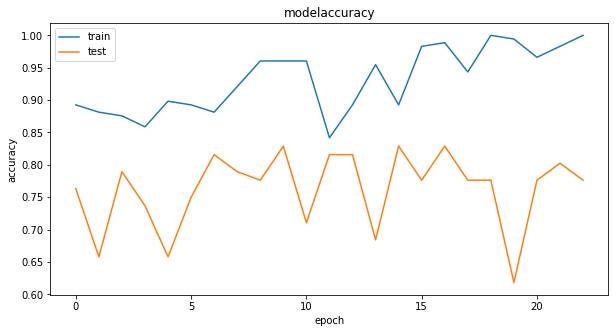

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


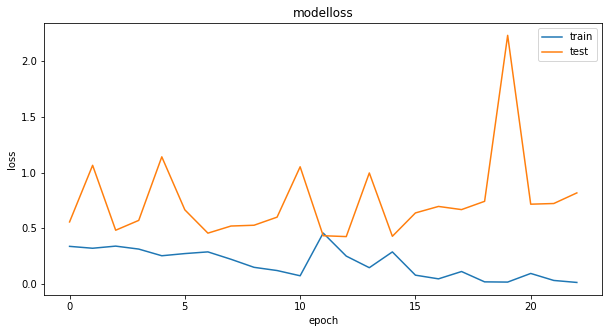

In [44]:
draw_history(history_vgg16)

<h1>VGG 19<h1>

In [45]:
model_vgg19 = VGG19(weights=None, include_top=False, input_shape = (224, 224, 3))# imagenet (par defaut)

In [46]:
# Freezing
model_vgg19.trainable =False

In [47]:
x = model_vgg19.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.45)(x)
x = Dense(256, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="sigmoid")(x)
model_final_vgg19 = Model(model_vgg19.input, x)

In [48]:
model_final_vgg19.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [49]:
model_final_vgg19.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['acc'])

In [50]:
history_vgg19 = model_final_vgg19.fit(X_train,y_train,
         batch_size=8,
         epochs=24,
         validation_data=(X_test, y_test))

Epoch 1/24
23/23 [==============================] - 3s 105ms/step - loss: 0.6878 - acc: 0.5612 - val_loss: 0.6402 - val_acc: 0.6447
Epoch 2/24
23/23 [==============================] - 2s 93ms/step - loss: 0.6892 - acc: 0.5664 - val_loss: 0.6342 - val_acc: 0.6447
Epoch 3/24
23/23 [==============================] - 2s 93ms/step - loss: 0.6319 - acc: 0.6309 - val_loss: 0.6399 - val_acc: 0.6447
Epoch 4/24
23/23 [==============================] - 2s 93ms/step - loss: 0.6344 - acc: 0.6017 - val_loss: 0.5644 - val_acc: 0.6974
Epoch 5/24
23/23 [==============================] - 2s 96ms/step - loss: 0.6011 - acc: 0.7230 - val_loss: 0.5939 - val_acc: 0.6842
Epoch 6/24
23/23 [==============================] - 2s 93ms/step - loss: 0.5979 - acc: 0.6503 - val_loss: 0.6346 - val_acc: 0.6579
Epoch 7/24
23/23 [==============================] - 2s 93ms/step - loss: 0.6570 - acc: 0.6957 - val_loss: 0.5698 - val_acc: 0.6974
Epoch 8/24
23/23 [==============================] - 2s 94ms/step - loss: 0.6044 - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


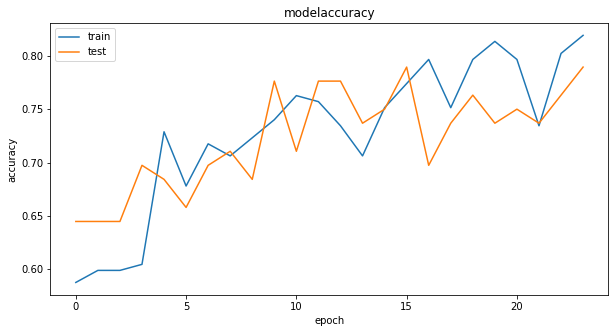

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


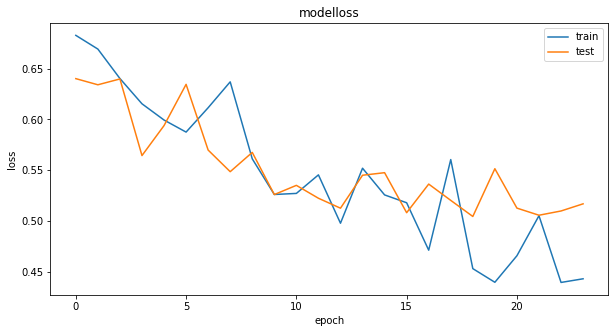

In [51]:
draw_history(history_vgg19)